<a href="https://colab.research.google.com/github/vatoer/pu-sentiment/blob/main/tweet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Update the file path with the correct location in Google Drive
file_path = '/content/drive/My Drive/data_tweet.txt'  # Note the change in the path

# Load the tab-delimited data
df = pd.read_csv(file_path, delimiter='\t')

# Preview the data
print(df.head())

df.columns = ['No', 'full_text', 'Sentiment']  # Adjust as necessary

# Replace 2 with -1 in the 'Sentiment' column
df['Sentiment'] = df['Sentiment'].replace(2, -1)

# Save the modified DataFrame to a new CSV file
df.to_csv('modified_data_tweet.csv', index=False, sep='\t')

    No                                          full_text  Sentiment
0  1.0  Kedatangan Presiden Prabowo di Tanah Air setel...        0.0
1  2.0  Pertemuan bilateral dengan Menteri Industri da...        1.0
2  3.0  Saya menerima kunjungan kehormatan Duta Besar ...        0.0
3  4.0  Menteri Keuangan Sri Mulyani Indrawati mengung...        2.0
4  5.0  Kemarin saya menerima kunjungan kehormatan Y.M...        0.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

# Load the tab-delimited data
df = pd.read_csv("modified_data_tweet.csv", delimiter='\t')

# Preview the data
print(df.head())

df.columns = ['No', 'full_text', 'Sentiment']  # Adjust as necessary



    No                                          full_text  Sentiment
0  1.0  Kedatangan Presiden Prabowo di Tanah Air setel...        0.0
1  2.0  Pertemuan bilateral dengan Menteri Industri da...        1.0
2  3.0  Saya menerima kunjungan kehormatan Duta Besar ...        0.0
3  4.0  Menteri Keuangan Sri Mulyani Indrawati mengung...       -1.0
4  5.0  Kemarin saya menerima kunjungan kehormatan Y.M...        0.0


In [5]:
import re

def clean_text(text):
    # Check if the input is a string
    if isinstance(text, str):
        text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
        text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
        return text.lower()  # Convert to lowercase
    else:
        # Handle non-string values (e.g., return an empty string or the original value)
        return ''  # or return text

df['clean_text'] = df['full_text'].apply(clean_text)

# Preview the cleaned text
print(df[['full_text', 'clean_text']].head())

                                           full_text  \
0  Kedatangan Presiden Prabowo di Tanah Air setel...   
1  Pertemuan bilateral dengan Menteri Industri da...   
2  Saya menerima kunjungan kehormatan Duta Besar ...   
3  Menteri Keuangan Sri Mulyani Indrawati mengung...   
4  Kemarin saya menerima kunjungan kehormatan Y.M...   

                                          clean_text  
0  kedatangan presiden prabowo di tanah air setel...  
1  pertemuan bilateral dengan menteri industri da...  
2  saya menerima kunjungan kehormatan duta besar ...  
3  menteri keuangan sri mulyani indrawati mengung...  
4  kemarin saya menerima kunjungan kehormatan ym ...  


In [5]:
!pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.1 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=077065b0350efecbe026a7fb7417ba0b672aeb827083dfae93658e6c3c0236b8
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Succ

In [6]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 6.9 MB/s eta 0:00:00


In [6]:

from googletrans import Translator
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Initialize the translator and sentiment analyzer
translator = Translator()
analyzer = SentimentIntensityAnalyzer()

def translate_and_analyze(text):
    # Check if the input is a string
    if isinstance(text, str):
        try:
            # Translate to English
            translated = translator.translate(text, dest='en').text
            # Perform sentiment analysis on the translated text
            vs = analyzer.polarity_scores(translated)
            return translated, vs['compound']  # Return both translated text and sentiment score
        except Exception as e:
            print(f"Error translating or analyzing text: {e}")
            return "", 0  # Return empty string and 0 in case of error
    else:
        # Handle non-string values (e.g., return 0 for neutral sentiment)
        return "", 0

# Apply the function and create new columns for translated text and sentiment scores
df['translated_text'], df['vader_sentiment'] = zip(*df['clean_text'].apply(translate_and_analyze))

# Preview the DataFrame with translated text and sentiment scores
print(df[['clean_text', 'translated_text', 'vader_sentiment']].head())

# Save to a CSV file
df.to_csv("translated_sentiment_data.csv", index=False)


                                          clean_text  \
0  kedatangan presiden prabowo di tanah air setel...   
1  pertemuan bilateral dengan menteri industri da...   
2  saya menerima kunjungan kehormatan duta besar ...   
3  menteri keuangan sri mulyani indrawati mengung...   
4  kemarin saya menerima kunjungan kehormatan ym ...   

                                     translated_text  vader_sentiment  
0  President Prabowo's arrival in Indonesia after...           0.0000  
1  Yesterday's bilateral meeting with the Ministe...           0.5994  
2  I received an honorary visit from the Tunisian...           0.3400  
3  Minister of Finance Sri Mulyani Indrawati reve...           0.3400  
4  Yesterday I received an honorary visit from Ho...           0.7096  


In [7]:
# Save the DataFrame to a CSV file
df.to_csv('sentiment_results.csv', index=False)

In [8]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df_sentiment = pd.read_csv("sentiment_results.csv")

# Display the first 5 rows (you can change the number if needed)
print(df_sentiment.head())

    No                                          full_text  Sentiment  \
0  1.0  Kedatangan Presiden Prabowo di Tanah Air setel...        0.0   
1  2.0  Pertemuan bilateral dengan Menteri Industri da...        1.0   
2  3.0  Saya menerima kunjungan kehormatan Duta Besar ...        0.0   
3  4.0  Menteri Keuangan Sri Mulyani Indrawati mengung...       -1.0   
4  5.0  Kemarin saya menerima kunjungan kehormatan Y.M...        0.0   

                                          clean_text  \
0  kedatangan presiden prabowo di tanah air setel...   
1  pertemuan bilateral dengan menteri industri da...   
2  saya menerima kunjungan kehormatan duta besar ...   
3  menteri keuangan sri mulyani indrawati mengung...   
4  kemarin saya menerima kunjungan kehormatan ym ...   

                                     translated_text  vader_sentiment  
0  President Prabowo's arrival in Indonesia after...           0.0000  
1  Yesterday's bilateral meeting with the Ministe...           0.5994  
2  I received 

Create Datasets and Dataloaders:


In [10]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Load the CSV file into a pandas DataFrame
df_sentiment = pd.read_csv("sentiment_results.csv")

# Function to categorize sentiment scores
def categorize_sentiment(score):
    if score >= 0.05:
        return 1  # Positive
    elif score <= -0.05:
        return -1  # Negative
    else:
        return 0  # Neutral

# Apply the function to create a new 'predicted_sentiment' column
df_sentiment['predicted_sentiment'] = df_sentiment['vader_sentiment'].apply(categorize_sentiment)

# Remove rows with NaN values in 'Sentiment' column
df_sentiment = df_sentiment.dropna(subset=['Sentiment'])

# Calculate the accuracy
accuracy = accuracy_score(df_sentiment['Sentiment'], df_sentiment['predicted_sentiment'])
print(f"Vader Accuracy: {accuracy}")

Vader Accuracy: 0.663594470046083


In [11]:
# prompt: make matriks of the count tweeet and sentiment based on vader vs bsed on original data

import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the sentiment analysis results
df_sentiment = pd.read_csv("sentiment_results.csv")

# Function to categorize sentiment scores
def categorize_sentiment(score):
    if score >= 0.05:
        return 1  # Positive
    elif score <= -0.05:
        return -1  # Negative
    else:
        return 0  # Neutral

# Apply the function to create a new 'predicted_sentiment' column
df_sentiment['predicted_sentiment'] = df_sentiment['vader_sentiment'].apply(categorize_sentiment)

# Ensure 'Sentiment' column exists and handle potential missing values
if 'Sentiment' not in df_sentiment.columns:
    print("Error: 'Sentiment' column not found in the DataFrame.")
else:
    df_sentiment = df_sentiment.dropna(subset=['Sentiment'])

    # Create the confusion matrix
    cm = confusion_matrix(df_sentiment['Sentiment'], df_sentiment['predicted_sentiment'])

    # Create a DataFrame from the confusion matrix
    cm_df = pd.DataFrame(cm,
                         index=['Actual -1', 'Actual 0', 'Actual 1'],  # Replace with your actual sentiment labels
                         columns=['Predicted -1', 'Predicted 0', 'Predicted 1']) # Replace with your predicted sentiment labels

    print("Confusion Matrix:")
cm_df

Confusion Matrix:


,Predicted -1,Predicted 0,Predicted 1
Actual -1,4,6,8
Actual 0,4,12,22
Actual 1,44,135,416


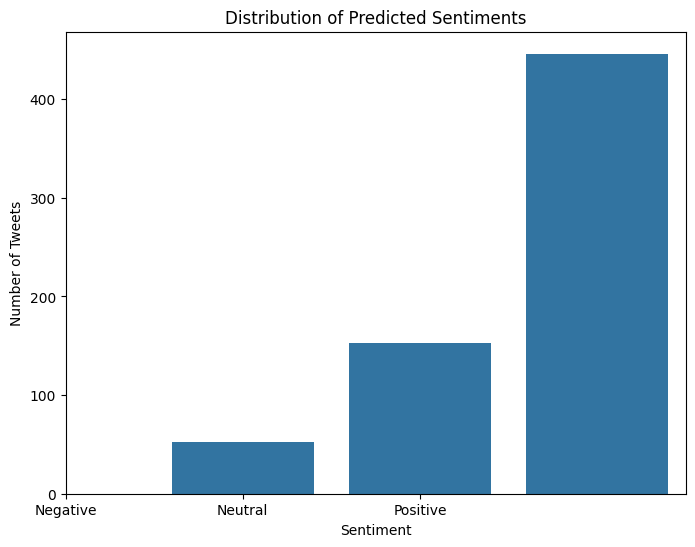

In [12]:
# prompt: make the plot graph of the sentiment

import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each sentiment category
sentiment_counts = df_sentiment['predicted_sentiment'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Distribution of Predicted Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks([0,1,-1],['Neutral', 'Positive', 'Negative'])
plt.show()

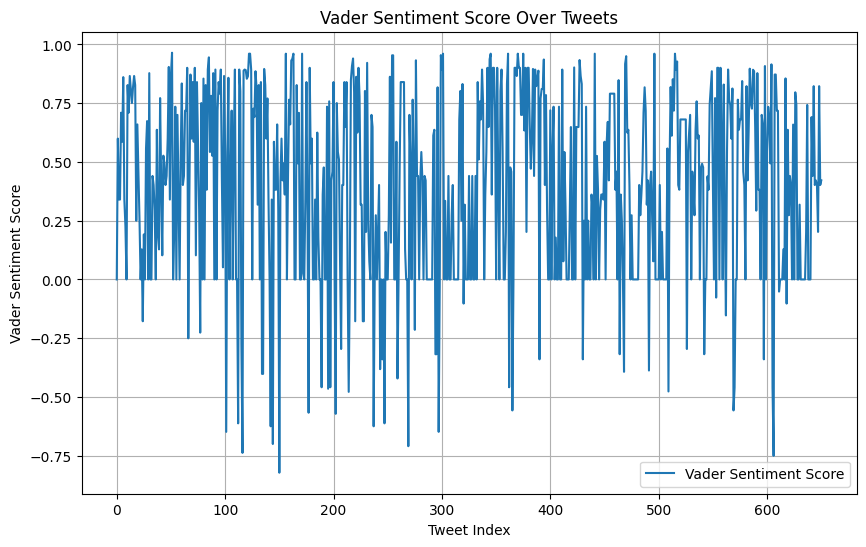

In [13]:
# prompt: make the line graph to show the accuracy based on the vader result

import matplotlib.pyplot as plt

# Assuming 'df_sentiment' DataFrame from the previous code is available

# Create the line graph
plt.figure(figsize=(10, 6))
plt.plot(df_sentiment['vader_sentiment'], label='Vader Sentiment Score')
plt.xlabel('Tweet Index')  # Or any relevant x-axis label
plt.ylabel('Vader Sentiment Score')
plt.title('Vader Sentiment Score Over Tweets')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# prompt: calculate the accuracy with compound sentiment scrore

# Assuming df_sentiment is already loaded and processed as in the provided code.

# Function to categorize sentiment scores (already defined in the provided code)
def categorize_sentiment(score):
    if score >= 0.05:
        return 1  # Positive
    elif score <= -0.05:
        return -1  # Negative
    else:
        return 0  # Neutral

# Apply the function to create a new 'predicted_sentiment' column (already done)
df_sentiment['predicted_sentiment'] = df_sentiment['vader_sentiment'].apply(categorize_sentiment)

# Remove rows with NaN values in 'Sentiment' column (already done)
df_sentiment = df_sentiment.dropna(subset=['Sentiment'])

# Calculate the accuracy (already done)
accuracy = accuracy_score(df_sentiment['Sentiment'], df_sentiment['predicted_sentiment'])
print(f"Vader Accuracy: {accuracy}")

Vader Accuracy: 0.663594470046083


Step 1: Load and Prepare Data



In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the sentiment results data
df_sentiment = pd.read_csv("sentiment_results.csv")

# Prepare data for IndoBERT
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df_sentiment['clean_text'].tolist(), df_sentiment['Sentiment'].tolist(),
    test_size=0.2, random_state=42
)

In [16]:
df_sentiment.head()

,No,full_text,Sentiment,clean_text,translated_text,vader_sentiment
0,1.0,Kedatangan Presiden Prabowo di Tanah Air setel...,0.0,kedatangan presiden prabowo di tanah air setel...,President Prabowo's arrival in Indonesia after...,0.0000
1,2.0,Pertemuan bilateral dengan Menteri Industri da...,1.0,pertemuan bilateral dengan menteri industri da...,Yesterday's bilateral meeting with the Ministe...,0.5994
2,3.0,Saya menerima kunjungan kehormatan Duta Besar ...,0.0,saya menerima kunjungan kehormatan duta besar ...,I received an honorary visit from the Tunisian...,0.3400
3,4.0,Menteri Keuangan Sri Mulyani Indrawati mengung...,-1.0,menteri keuangan sri mulyani indrawati mengung...,Minister of Finance Sri Mulyani Indrawati reve...,0.3400
4,5.0,Kemarin saya menerima kunjungan kehormatan Y.M...,0.0,kemarin saya menerima kunjungan kehormatan ym ...,Yesterday I received an honorary visit from Ho...,0.7096


In [16]:
pip install transformers torch scikit-learn pandas


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch
from torch.utils.data import Dataset


In [18]:
# Check if train_texts and val_texts are lists of strings
print(type(train_texts))
print(type(train_texts[0]))
print(train_texts[:5])  # Print the first few items to inspect


<class 'list'>
<class 'str'>
['penambahan kementrian di kabinet prabowogibran demokrat upaya meningkatkan sistem pemerintahan yang lebih baik ahy demokrat kabinetmerahputih ', 'tegas dan transparansi dalam memberantas korupsi kejagung jadi garda terdepan dalam pemberantasan korupsi loyalitaskejagung febrieardiansyah jampidsusdiuntit bagimunegeri usuttuntas fyp cepatfyp tranding vidios prabowo kabinet kabinetmerahputih tren news ', 'pertemuan dengan sahabat lama dubes suryo pratomo dari singapore sambil persiapan bilateral pemerintah indonesiasingapura besok indonesiasingapore sahabat kemhan kemhanri terusbekerja diplomasi sjafriesjamsoeddin prabowo kabinetmerahputih diplomasipertahanan ', 'hai sohib selain melantik menteri wakil menteri amp kepala badanlembaga presiden prabowo juga melantik penasihat utusan amp stafkhusus presiden apa sih perbedaan ketiganya yuk simak infonya kemensetnegri indonesiabaik kabinetmerahputih kabinet2024 prabowogibran ', 'seserius itu presiden prabowo beren

In [19]:
# Check the type of each element in the train_texts
non_string_elements = [text for text in train_texts if not isinstance(text, str)]
print("Number of non-string elements:", len(non_string_elements))
print("Sample non-string elements:", non_string_elements[:5])


Number of non-string elements: 51
Sample non-string elements: [nan, nan, nan, nan, nan]


In [20]:
# Convert all elements to strings
train_texts = [str(text) for text in train_texts]
val_texts = [str(text) for text in val_texts]


4. Tokenize

In [21]:
# Load the IndoBERT tokenizer
tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1')

# Tokenize the data
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=128)


create custom dataset

In [22]:
class SentimentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

# Create dataset objects
train_dataset = SentimentDataset(train_encodings, train_labels)
val_dataset = SentimentDataset(val_encodings, val_labels)


set up model

In [23]:
# Load the IndoBERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('indobenchmark/indobert-base-p1', num_labels=len(set(train_labels)))


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [24]:
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    # evaluation_strategy="epoch",
    report_to=[]  # Disable wandb and other logging integrations
)


In [25]:
import torch

# ... (Your existing code) ...

class SentimentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        # Convert label to one-hot encoding
        label = self.labels[idx]
        num_labels = len(set(train_labels)) # Assuming train_labels is accessible here
        one_hot_label = torch.zeros(num_labels)
        one_hot_label[label] = 1
        item['labels'] = one_hot_label # Assign the one-hot encoded label
        return item

# Create dataset objects (rest of your code remains unchanged)
train_dataset = SentimentDataset(train_encodings, train_labels)
val_dataset = SentimentDataset(val_encodings, val_labels)

Build Model

In [32]:
!pip install tensorflow-text
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 104.6 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


ERROR: Operation cancelled by user


In [26]:

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text  # Import tensorflow_text


tfhub_handle_preprocess = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'
tfhub_handle_encoder = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'


In [28]:
def build_classifier_model(dropout_rate=0.1):
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name="text")
    preprocessing_layer = hub.KerasLayer(
        tfhub_handle_preprocess, name="preprocessing"
    )
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(
        tfhub_handle_encoder, trainable=True, name="BERT_encoder"
    )
    outputs = encoder(encoder_inputs)
    net = outputs["pooled_output"]
    net = tf.keras.layers.Dropout(dropout_rate)(net)
    net = tf.keras.layers.Dense(1, activation="sigmoid", name="classifier")(net)
    # Wrap text_input in a list when creating the model
    return tf.keras.Model(inputs=[text_input], outputs=net)

In [29]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

# Start training
trainer.train()


IndexError: only integers, slices (`:`), ellipsis (`...`), None and long or byte Variables are valid indices (got float)